/var/folders/k3/xf5hs7g94kg9b9n84jk35czh0000gn/T/ipykernel_80066/3294327290.py:21: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qpe_circuit.compose(QFT(3, inverse=True), [0, 1, 2], inplace=True)


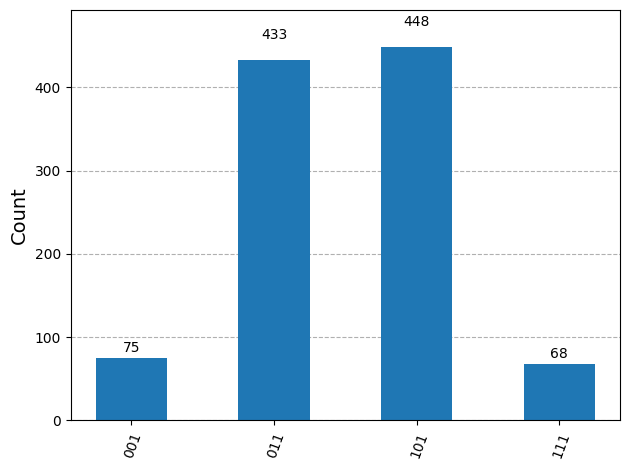

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create the quantum circuit
qpe_circuit = QuantumCircuit(4, 3)  # 4 qubits, 3 classical bits

# Prepare the eigenstate |1⟩ for the Z gate
qpe_circuit.x(3)  # Apply X gate to flip the last qubit to |1⟩

# Apply Hadamard gates
qpe_circuit.h([0, 1, 2])

# Apply controlled unitary (Controlled-Z gates)
qpe_circuit.cz(0, 3)  # Applying once implies a phase of 1
qpe_circuit.cz(1, 3)  # Applying once implies a phase of 1
qpe_circuit.cz(2, 3)  # Applying once implies a phase of 1

# Apply inverse QFT
qpe_circuit.compose(QFT(3, inverse=True), [0, 1, 2], inplace=True)

# Measure
qpe_circuit.measure([0, 1, 2], [0, 1, 2])

# Set up the simulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
transpiled_qpe_circuit = transpile(qpe_circuit, simulator)

# Run the simulation
result = simulator.run(transpiled_qpe_circuit, shots=1024).result()

# Get the counts
counts = result.get_counts()

# Plot the histogram
plot_histogram(counts)


In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel, pauli_error


ModuleNotFoundError: No module named 'qiskit.providers.aer'